<a href="https://colab.research.google.com/github/Lee-Geunhee/Lee-Geunhee/blob/main/project2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/전처리 0320_3')

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [5]:
df

,Unnamed: 0,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_코드,상권_변화_지표,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,아파트_단지_수,...,아파트_평균_시가,남성_직장_인구_수,여성_직장_인구_수,남성 상주인구 수,여성 상주인구 수,총 가구 수,분기당_매출_금액,분기당_매출_건수,점포수,커피_분기_매출
0,0,2021,4,U,1001495,LL,3371333,1642782,1728551,26,...,566567911,14199,10176,4250,5389,6122,5935893065,582068,94,6.314780e+07
1,1,2021,4,U,1001494,HH,3868466,2102996,1765468,8,...,114850602,17150,15785,1303,674,1591,5582224702,760925,143,3.903654e+07
2,2,2021,4,U,1001493,HH,3218311,1544837,1673475,11,...,245511812,2958,3096,1294,1409,1753,2179764901,364016,91,2.395346e+07
3,3,2021,4,U,1001491,HH,1905510,948480,957032,70,...,428764829,3064,2775,2451,2723,3364,5791591262,444762,93,6.227517e+07
4,4,2021,4,R,1001490,LL,1040277,473786,566491,39,...,191078841,242,188,1500,1531,1319,68709054,16096,6,1.145151e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21556,21556,2017,1,A,1000006,LH,61561,31444,30117,3,...,182436508,10,8,313,369,368,557784212,34764,6,9.296404e+07
21557,21557,2017,1,A,1000005,LL,2161,378,1784,40,...,194920635,62,57,862,910,729,468476964,26261,5,9.369539e+07
21558,21558,2017,1,A,1000004,LH,255472,147450,108024,40,...,92740830,12,8,763,734,869,58764678,15627,7,8.394954e+06
21559,21559,2017,1,A,1000003,HH,90201,54773,35428,5,...,136967555,571,508,647,503,746,276731302,19335,11,2.515739e+07


In [6]:
import numpy as np

In [7]:
df = df[(df['커피_분기_매출'] >= np.percentile(df['커피_분기_매출'], 5)) & 
        (df['커피_분기_매출'] <= np.percentile(df['커피_분기_매출'], 95))] 

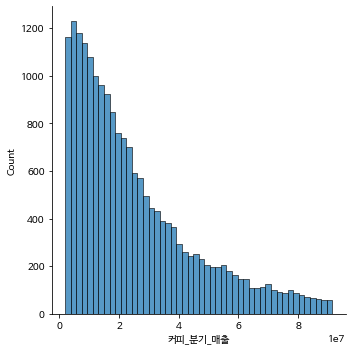

In [8]:
import seaborn as sns
sns.displot(df['커피_분기_매출'])


In [9]:
df['로그_커피_분기_매출'] = np.log1p(df['커피_분기_매출'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


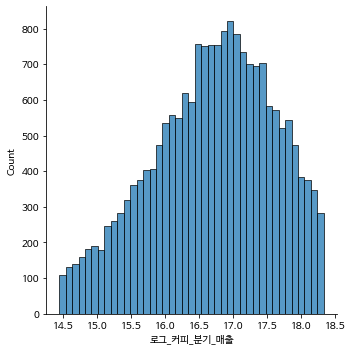

In [10]:
sns.displot(df['로그_커피_분기_매출'])

In [11]:
train = df.sample(frac=0.80,random_state=42)
test = df.drop(train.index)

In [12]:
target = '로그_커피_분기_매출'
feature = ['상권_구분_코드', '상권_변화_지표',
       '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수', '아파트_단지_수', '아파트_평균_면적',
       '아파트_평균_시가', '남성_직장_인구_수', '여성_직장_인구_수', '남성 상주인구 수', '여성 상주인구 수',
       '총 가구 수', '점포수']

In [13]:
X_train = train[feature]
X_test = test[feature]
y_train = train[target]
y_test = test[target]

In [14]:
!pip install category_encoders

In [17]:
from category_encoders import OrdinalEncoder

In [18]:
encoder = OrdinalEncoder()
X_train= encoder.fit_transform(X_train) # 학습데이터
X_test= encoder.transform(X_test) # 검증데이터

In [19]:
predict = y_train.mean()

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
################## 평균을 기준모델로 ##########

In [22]:
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러: {mae:.2f}')

훈련 에러: 0.74


In [23]:
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 0.73


In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_test, y_pred)

-0.0002102700540549396

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 0.65


In [30]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 0.64


In [31]:
r2_score(y_test, y_pred)

0.20244011050909017

In [ ]:
############################## 릿지모델 ###############################

In [32]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [33]:
def RidgeCVRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         RidgeCV(**kwargs))

# alphas = np.linspace(0.01, 0.5, num=20)
alphas = np.arange(0.01, 0.2, 0.01)

model = RidgeCVRegression(alphas=alphas, normalize=True, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Test MAE: $1
R2 Score: 0.2947

Number of Features: 680
alpha: 0.01
cv best score: 0.269226622799921


In [34]:
print(f'Test MAE: {mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}')

Test MAE: 1
R2 Score: 0.2947

Number of Features: 680
alpha: 0.01
cv best score: 0.269226622799921


In [35]:
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 0.60


In [36]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 0.60


In [37]:
r2_score(y_test, y_pred)

0.2946906994127003

In [ ]:
####################### xg 부스트 #######################

In [38]:
from category_encoders import OrdinalEncoder
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [39]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_test_encoded = encoder.transform(X_test) # 검증데이터

In [40]:
boosting = XGBRegressor(
    n_estimators=1000,
    objective='reg:squarederror', # default
    learning_rate=0.2,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_test_encoded, y_test)]

boosting.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=50
         )

[0]	validation_0-rmse:12.9834	validation_1-rmse:12.9703
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:10.3986	validation_1-rmse:10.3866
[2]	validation_0-rmse:8.33319	validation_1-rmse:8.32186
[3]	validation_0-rmse:6.6838	validation_1-rmse:6.67282
[4]	validation_0-rmse:5.36806	validation_1-rmse:5.3569
[5]	validation_0-rmse:4.32023	validation_1-rmse:4.30959
[6]	validation_0-rmse:3.4876	validation_1-rmse:3.47663
[7]	validation_0-rmse:2.82849	validation_1-rmse:2.81709
[8]	validation_0-rmse:2.30975	validation_1-rmse:2.29796
[9]	validation_0-rmse:1.90436	validation_1-rmse:1.89228
[10]	validation_0-rmse:1.59142	validation_1-rmse:1.5794
[11]	validation_0-rmse:1.35297	validation_1-rmse:1.34122
[12]	validation_0-rmse:1.17467	validation_1-rmse:1.16287
[13]	validation_0-rmse:1.0445	validation_1-rmse:1.03329
[14]	validation_0-rmse:0.951213	validation_1-rmse:0.940753

XGBRegressor(learning_rate=0.2, n_estimators=1000, n_jobs=-1,
             objective='reg:squarederror')

In [41]:
y_pred = boosting.predict(X_test_encoded)
print('R^2', r2_score(y_test, y_pred))

R^2 0.676201404354184


In [ ]:
! pip install pdpbox

In [43]:
from category_encoders import TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
linear = make_pipeline(
    TargetEncoder(),  
    LinearRegression()
)

linear.fit(X_train, y_train)
print('R^2', linear.score(X_test, y_test))

R^2 0.20244011050909017


In [46]:
coefficients = linear.named_steps['linearregression'].coef_

In [48]:
pd.Series(coefficients)

0     2.848818e-01
1     5.839375e-03
2    -2.265991e-03
3     2.267846e-03
4     2.263960e-03
5    -4.127817e-04
6     3.317290e-03
7     8.902729e-12
8    -4.831404e-06
9     3.037216e-05
10   -9.350894e-04
11    4.178988e-04
12    3.208979e-04
13    9.865404e-03
dtype: float64

In [49]:
from pdpbox.pdp import pdp_isolate, pdp_plot

In [50]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = '점포수'

In [54]:
isolated = pdp_isolate(
    model=boosting, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature
)

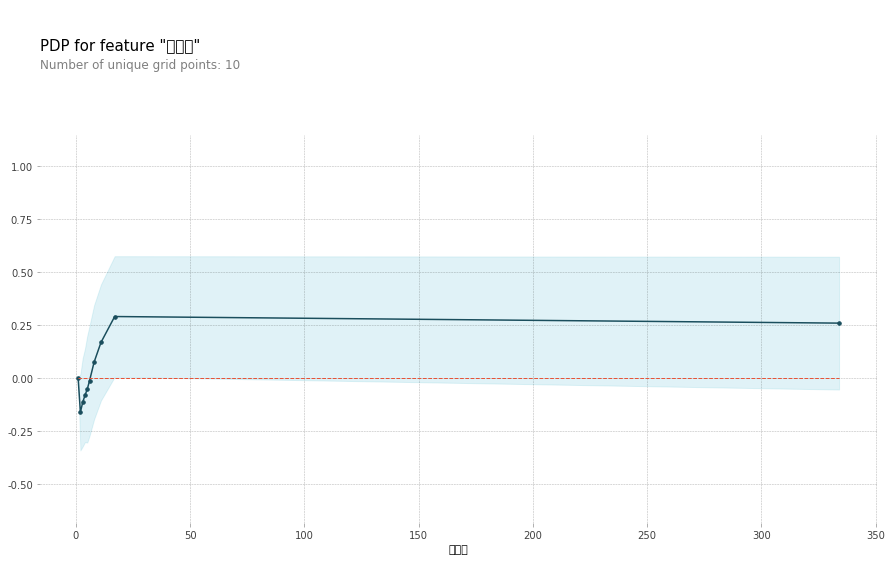

In [55]:
pdp_plot(isolated, feature_name=feature);

In [56]:
isolated = pdp_isolate(
    model=boosting, 
    dataset=X_test_encoded, 
    model_features=X_test.columns, 
    feature=feature,
    num_grid_points=100, # grid 포인트를 더 줄 수 있습니다. default = 10
)

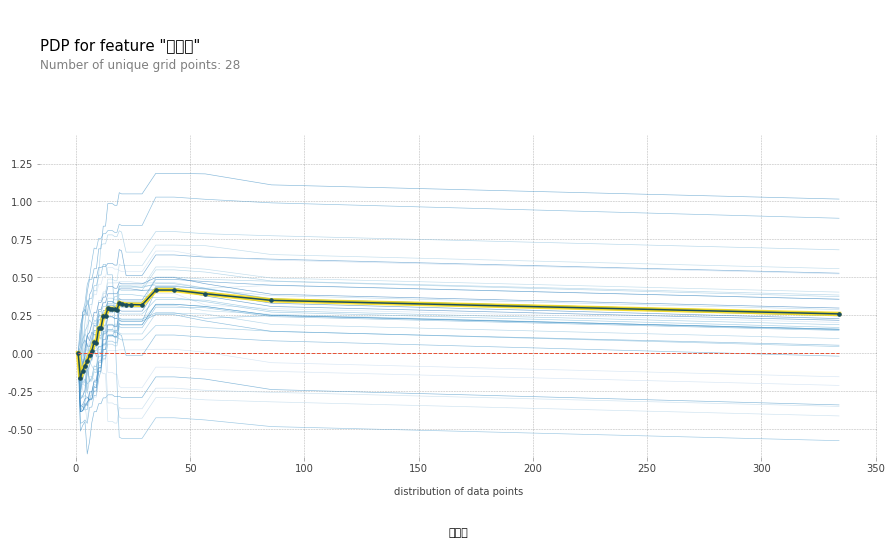

In [57]:
pdp_plot(isolated
         , feature_name=feature
         , plot_lines=True
         , frac_to_plot=0.01 # ICE curves는 100개
         , plot_pts_dist=True )

plt.xlim(20000,150000);

In [58]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [62]:
features = ['점포수', '총_생활인구_수']

interaction = pdp_interact(
    model=boosting, 
    dataset=X_test_encoded,
    model_features=X_test.columns, 
    features=features
)

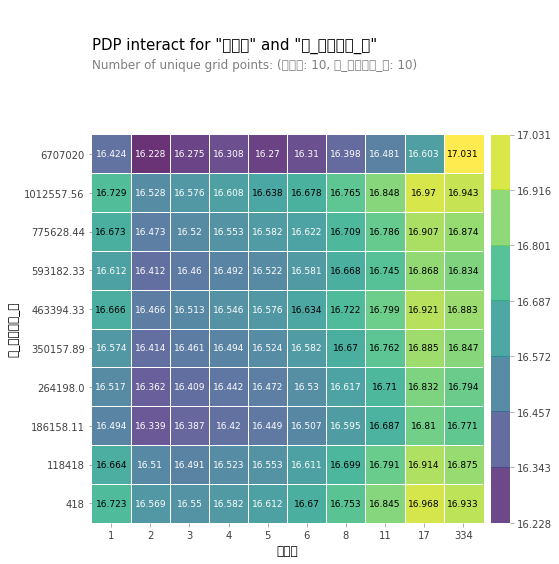

In [63]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [64]:
from xgboost import plot_importance

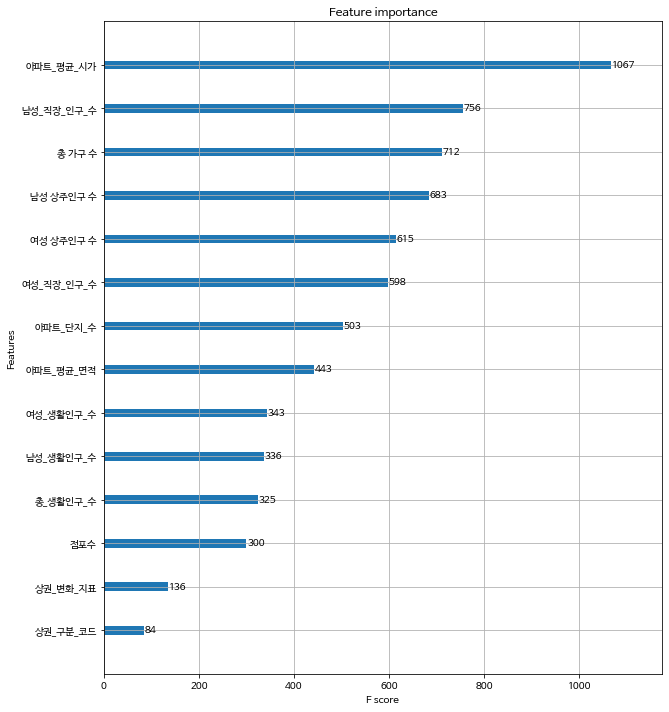

In [66]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(boosting, ax=ax)